# Multiple Linear Regression

> All models are wrong, but some are useful. (George E. P. Box)

The goals of this chapter:
- Construct and interpret linear regression models with **more than one** predictor.
- Understand how regression models are derived using matrices.
- Create interval estimates and perform hypothesis tests for multiple regression parameters.
- Evaluate the fit of the model.

## Model

**Before we begin**: 

- $y_i\quad\quad\quad\quad\quad\quad\,\,$ dependent variable or outcome;       
- $x_{ik}\quad\quad\quad\quad\quad\,\,\,\,\,$ $k$th independent variable or predictor or covariate;    
- $\boldsymbol{\beta} = (\beta_1, \ldots, \beta_p)^T\,\,\,\,\,$ vector of unknown parameters;
- $\epsilon_i\quad\quad\quad\quad\quad\quad\,\,$ mean-zero stochastic error term;
- $p\quad\quad\quad\quad\quad\quad\,\,\,$ number of predictors (and parameters);
- $i\quad\quad\quad\quad\quad\quad\,\,\,\,$ individual observation;
- $n\quad\quad\quad\quad\quad\quad\,\,\,$ sample size.

Capital letters (not the bold ones) denote random variables while small letters denote the realization of these random variables.

We will impose the following assumptions on the relationship between the outcome and the predictors.

### Assumption 1: Linearity

We can approximate the true relationship between $y_i$ and $\{x_{i1}, \ldots, x_{ip}\}$ by a linear function, that is we can write

$$y_i = \beta_1 x_{i1} + \beta_2 x_{i2} + \ldots + \beta_p x_{ip} + \epsilon_i, \qquad i = 1, 2, \ldots, n,$$

or, equivalently,

$$y_i = \sum_{k=1}^p \beta_k x_{ik}+ \epsilon_i, \qquad i = 1, 2, \ldots, n.$$

We can include the constant by setting $x_{i1} = 1$ for all $i$. In what follows, the constant is included in the model unless explicitly stated otherwise.

**Note 1:** Almost as often, authors will use $p$ as the number of predictors without the constant, including $\beta_0$ in the vector of unknown parameters and thus making the total number of the parameters to be equal $p+1$. This is always something you should be aware of when reading about multiple regression. There is not a standard that is used most often.

**Note 2:** a simple linear regression model (with a single predictor) is often written as $y_i = \beta_0 + \beta_1 x_i + \epsilon_i$.

If we were to stack together the $n$ linear equations that represent each $Y_i$ into a column vector, we get the following.

$$
\begin{bmatrix}
y_1   \\
y_2   \\
\vdots\\
y_n   \\
\end{bmatrix}
=
\begin{bmatrix}
x_{11}    & x_{12}    & \cdots & x_{1p} \\
x_{21}    & x_{22}    & \cdots & x_{2p} \\
\vdots    & \vdots    &  & \vdots \\
x_{n1}    & x_{n2}    & \cdots & x_{np)} \\
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_{p} \\
\end{bmatrix}
+
\begin{bmatrix}
\epsilon_1   \\
\epsilon_2   \\
\vdots\\
\epsilon_n   \\
\end{bmatrix}.
$$

We can write the above expression in the matrix notation:
$$
\mathbf{y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon},
$$

where

$$
\mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots\\ y_n \end{bmatrix}, \quad
\mathbf{X} = \begin{bmatrix}
x_{11}    & x_{12}    & \cdots & x_{1p} \\
x_{21}    & x_{22}    & \cdots & x_{2p} \\
\vdots    & \vdots    &  & \vdots \\
x_{n1}    & x_{n2}    & \cdots & x_{np)} \\
\end{bmatrix}, \quad
\boldsymbol{\beta} = \begin{bmatrix}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_{p} \\
\end{bmatrix}, \quad
\boldsymbol{\epsilon} = \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ \vdots\\ \epsilon_n \end{bmatrix}
$$

We will also need the $p$ dimensional (column) vector $\mathbf{x}_i$ that consists of all $i$th predictors:
$$
\mathbf{x}_i = \begin{bmatrix} x_{i1} \\ x_{i2} \\ \vdots\\ x_{ip} \end{bmatrix}.
$$

Using $\mathbf{x}_i$, we can write the matrix of predictors $\mathbf{X}$ as

$$
\mathbf{X} = \begin{bmatrix}
\mathbf{x}_1^T \\
\mathbf{x}_2^T \\
\vdots    \\
\mathbf{x}_n^T \\
\end{bmatrix}.
$$


In all of these equations the parameters $\beta_1, \ldots, \beta_p$ are unknown, so we need to estimate them somehow. The idea is to find the values $\hat{\boldsymbol{\beta}} = (\hat{\beta}_1, \ldots, \hat{\beta}_p)^T$ such that the linear model fits the available data well - that is, so that
$$
\mathbf{y} \approx \mathbf{X} \hat{\boldsymbol{\beta}}.
$$

In other words, we would like to fit a hyperplane as *close* as possible to the data. After we do that, we will be able to make predictions using the estimated coeefficients:
$$
\hat{y}_i = \sum_{k=1}^p \hat{\beta}_k x_{ik} = \mathbf{x}_i^T \hat{\boldsymbol{\beta}}, \qquad i = 1, 2, \ldots, n.$$

Before we proceed with the theory, let's have a look at the real dataset. [This dataset](http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data), which can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Auto+MPG) concerns city-cycle fuel consumption and contains a dependent variable `mpg` which stores the city fuel efficiency of cars, as well as several predictor variables for the attributes of the vehicles. In the following chunck of code, we load the data and perform some basic tidying before moving on to analysis.

In [1]:
# read the data from the web
autompg = read.table(
  "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
  quote = "\"",
  comment.char = "",
  stringsAsFactors = FALSE)
# give the dataframe headers
colnames(autompg) = c("mpg", "cyl", "disp", "hp", "wt", "acc", "year", "origin", "name")
# remove missing data, which is stored as "?"
autompg = subset(autompg, autompg$hp != "?")
# remove the plymouth reliant, as it causes some issues
autompg = subset(autompg, autompg$name != "plymouth reliant")
# give the dataset row names, based on the engine, year and name
rownames(autompg) = paste(autompg$cyl, "cylinder", autompg$year, autompg$name)
# remove the variable for name, as well as origin
autompg = subset(autompg, select = c("mpg", "cyl", "disp", "hp", "wt", "acc", "year"))
# change horsepower from character to numeric
autompg$hp = as.numeric(autompg$hp)
# check final structure of data
str(autompg)

'data.frame':	390 obs. of  7 variables:
 $ mpg : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cyl : int  8 8 8 8 8 8 8 8 8 8 ...
 $ disp: num  307 350 318 304 302 429 454 440 455 390 ...
 $ hp  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ wt  : num  3504 3693 3436 3433 3449 ...
 $ acc : num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year: int  70 70 70 70 70 70 70 70 70 70 ...


For now we will focus on only two variables as predictors: weight of the car, `wt`, and the model year, `year`. This means that we will model the fuel efficiency of a car as a linear function of its weight and model year:

$$
y_i = \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i3} + \epsilon_i, \qquad i = 1, 2, \ldots, n.
$$

Here we denote:
- $x_{i1} = 1$ for all $i$ (intercept);
- $x_{i2}$ is the weight (`wt`) of the $i$th car;
- $x_{i3}$ is the model year (`year`) of the $i$th car.

The picture below will visualize what we would like to accomplish. The data points $(x_{i2}, x_{i3}, y_i)$ now exist in 3-dimensional space, so instead of fitting a line to the data in the case of a simple linear regression, we will fit a plane.

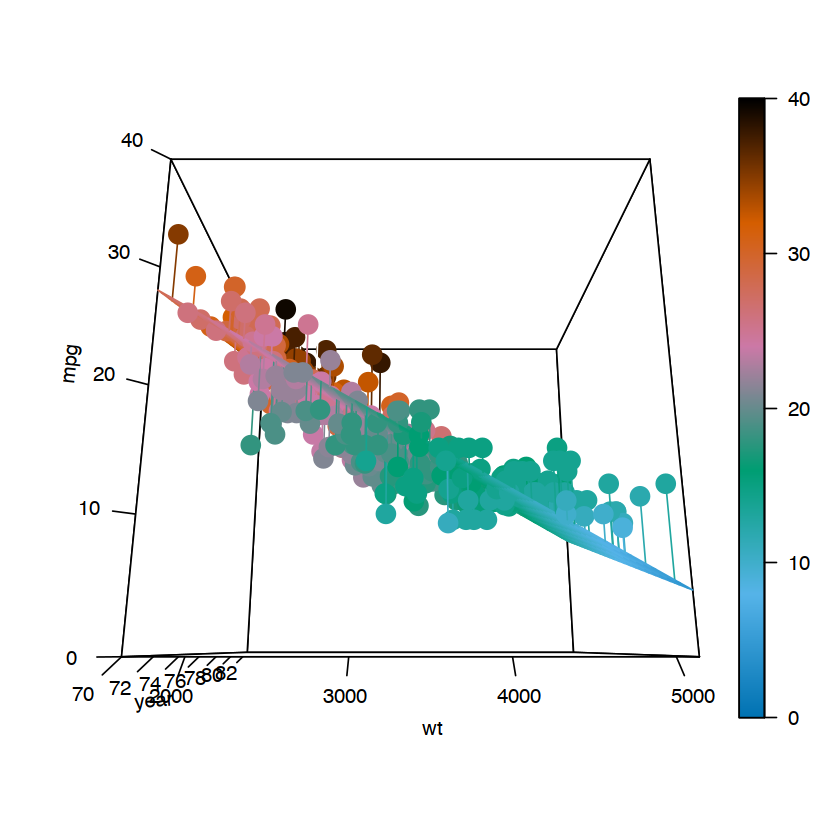

In [2]:
library("plot3D")
x = autompg$wt
y = autompg$year
z = autompg$mpg
fit <- lm(z ~ x + y)
grid.lines = 25
x.pred     = seq(min(x), max(x), length.out = grid.lines)
y.pred     = seq(min(y), max(y), length.out = grid.lines)
xy         = expand.grid(x = x.pred, y = y.pred)
z.pred = matrix(predict(fit, newdata = xy), 
                nrow = grid.lines, ncol = grid.lines)
fitpoints = predict(fit)
scatter3D(x, y, z, pch = 19, cex = 2, col = gg.col(1000), lighting = TRUE,
          theta = 0, phi = -15, ticktype = "detailed",
          xlab = "wt", ylab = "year", zlab = "mpg", zlim = c(0, 40), clim = c(0, 40),
          surf = list(x = x.pred, y = y.pred, z = z.pred,  
                      facets = NA, fit = fitpoints), main = "")

Here the plane on the plot is the one that is as close as possible to the data points. Now the question is: how to measure *closeness*?

The most common approach is to use the *least squares* criterion, i.e. to minimize the residual sum of squares:

$$
\begin{align*}
\text{RSS}({\beta}^*_1, \ldots, \beta^*_p) &= \sum_{i = 1}^{n}(y_i - \hat{y}_i)^2\\
&= \sum_{i = 1}^{n}(y_i - (\beta^*_1 x_{i1} + \ldots + \beta^*_p x_{ip}))^2\\
&= \sum_{i = 1}^{n}(y_i - \mathbf{x}_i^T \boldsymbol{\beta}^*)^2
\end{align*}
$$
with respect to $\beta_1^*, \ldots, \beta_p^*$. Using matrix notation, we can write

$$
\text{RSS}(\boldsymbol{\beta}^*) = (\mathbf{y} - \mathbf{X}\boldsymbol{\beta}^*)^T(\mathbf{y} - \mathbf{X}\boldsymbol{\beta}^*).
$$

Thus, we define the OLS estimator $\hat{\boldsymbol{\beta}}$ as 

$$
\hat{\boldsymbol{\beta}} := \arg\min_{\boldsymbol{\beta}^* \in \mathbf{R}} \text{RSS}(\boldsymbol{\beta}^*).
$$

And now we solve it:

$$
\begin{align}
\text{RSS}(\boldsymbol{\beta}^*) &= \mathbf{y}^T \mathbf{y} - \big(\mathbf{X}\boldsymbol{\beta}^*\big)^T \mathbf{y} - \mathbf{y}^T \mathbf{X}\boldsymbol{\beta}^* + \big(\mathbf{X}\boldsymbol{\beta}^*\big)^T\big(\mathbf{X}\boldsymbol{\beta}^*\big)\\
& = \mathbf{y}^T \mathbf{y} - 2 {\boldsymbol{\beta}^*}^T \mathbf{X}^T\mathbf{y} + {\boldsymbol{\beta}^*}^T \mathbf{X}^T\mathbf{X}\boldsymbol{\beta}^*.
\end{align}
$$

Thus, 
$$
\begin{align}
\frac{\partial}{\partial\boldsymbol{\beta}^*}\text{RSS}(\boldsymbol{\beta}^*) &= - 2 \mathbf{X}^T\mathbf{y} + 2 \mathbf{X}^T\mathbf{X}\boldsymbol{\beta}^*.
\end{align}
$$

Since $\hat{\boldsymbol{\beta}}$ minimizes the sum of squared residuals, we can write:

$$
\begin{align}
\frac{\partial}{\partial\boldsymbol{\beta}^*}\text{RSS}(\hat{\boldsymbol{\beta}}) &= - 2 \mathbf{X}^T\mathbf{y} + 2 \mathbf{X}^T\mathbf{X}\hat{\boldsymbol{\beta}} = 0\\
\mathbf{X}^T\mathbf{X}\hat{\boldsymbol{\beta}} &= \mathbf{X}^T\mathbf{y}\\
\hat{\boldsymbol{\beta}} &= \big(\mathbf{X}^T\mathbf{X}\big)^{-1}\mathbf{X}^T\mathbf{y}.
\end{align}
$$

Here we implicitly assumed that the matrix $\mathbf{X}^T\mathbf{X}$ is invertible. The formal assumption is stated below.

### Assumption 2: Full rank (or no multicollinearity)

With probability $1$, we have

$$\text{rank}(\mathbf{X}^T\mathbf{X}) = p.$$

**Note:** Beware of the possibility of a potential computational problem: when an arithmetic operation involves both
very large numbers and very small numbers, floating-point calculation can produce inaccurate results. This is relevant in the computation of OLS estimates when the regressors greatly differ in magnitude.

### Assumption 3: Strict exogeneity

$$\mathbb{E} (\epsilon_i | \mathbf{x}_1, \ldots, \mathbf{x}_n) = 0 \quad (i = 1, \ldots, n).$$

Here, the expectation (mean) is conditional on the regressors for all observations. This point may be made more apparent by writing the assumption without using the data matrix as

$$\mathbb{E} (\epsilon_i | \mathbf{X}) = 0 \quad (i = 1, \ldots, n).$$

**Note:** Do not confuse strict exogeneity and zero unconditional mean ($\mathbb{E}(\epsilon_i) = 0$ for all $i$). They are different! Consider a simple example. Suppose we look at a simple linear regression where the only predictor $x_i$ is equal to $1$ if $i$th individual is male, and is equal to $0$ if $i$th individual is female. Suppose that in the population the number of the males and the number of the females are the same, hence, $P(x_i = 0) = P(x_i = 1) = \frac{1}{2}$. Suppose that $\epsilon_i | X_i = 1 \sim N(1, \sigma^2)$ and  $\epsilon_i | X_i = 0 \sim N(-1, \sigma^2)$. Then we will have

$$ \mathbb{E} (\epsilon_i | x_i = 1) = 1 \text{ and } \mathbb{E} (\epsilon_i | x_i = 0) = -1 \quad\Rightarrow\quad \mathbb{E} (\epsilon_i | \mathbf{X}) \neq 0!$$

But using the law of iterated expectations, we have

$$\mathbb{E}(\epsilon_i) = \mathbb{E} (\epsilon_i | x_i = 1) \cdot P(x_i = 1) + \mathbb{E} (\epsilon_i | x_i = 0) \cdot P(x_i = 0) = 1\cdot \frac{1}{2} + (-1) \frac{1}{2} = 0.$$

**Implications of strong exogeneity.**

1. Unconditional mean is equal to zero:

$$ \mathbb{E}(\epsilon_i) = \mathbb{E}(\mathbb{E} (\epsilon_i | \mathbf{X})) = 0. $$

2. Each regressor is orthogonal to the error term for all observations (sometimes called weak exogeneity):

$$\mathbb{E}(x_{jk}\epsilon_i) = 0 \quad (i, j = 1, \ldots, n;\, k = 1, \ldots, p).$$

Proof:

$$\begin{aligned}
\mathbb{E}(x_{jk}\epsilon_i) &= \mathbb{E}[\mathbb{E} (x_{jk}\epsilon_i | x_{jk})] = \mathbb{E}(x_{jk}\mathbb{E} (\epsilon_i | x_{jk})) = 0 \text{ since }\\
\mathbb{E}(\epsilon_i | x_{jk}) & =\mathbb{E}[\mathbb{E}(\epsilon_i | \mathbf{X})| x_{jk}] = 0,
\end{aligned}$$

where the last line holds because $x_{jk}$ is contained in $\mathbf{X}$.

3. Each regressor and each error term are uncorrelated:

$$ Cov(\epsilon_i , x_{jk}) = 0\quad (i, j = 1, \ldots, n;\, k = 1, \ldots, p).$$

This is a direct implication of 1. and 2.:

$$\begin{aligned}
 Cov(\epsilon_i , x_{jk}) &= \mathbb{E}(x_{jk}\epsilon_i) - \mathbb{E}(x_{jk}) \mathbb{E}(\epsilon_i) \quad \text{ (by definition of covariance) }\\
 &= \mathbb{E}(x_{jk}\epsilon_i) \quad \text{ (since } \mathbb{E}(\epsilon_i) = 0)\\
 & = 0 \quad \text{ (by the orthogonality conditions). }
 \end{aligned}
 $$
 
In particular, for $i = j$, $Cov (x_{ik} \epsilon_i) =  0$. Therefore, strict exogeneity implies the requirement (familiar to those who have studied econometrics before) that the regressors be contemporaneously uncorrelated with the error term.

### Assumption 4: Spherical error variance

Homoskedasticity:

$$\mathbb{E}(\epsilon_i^2 | \mathbf{X}) = \sigma^2 > 0, \quad i = 1, \ldots, n;$$

and no correlation between observations:

$$\mathbb{E}(\epsilon_i \epsilon_j | \mathbf{X}) = 0, \quad i, j = 1, \ldots, n, i \neq j.$$

The homoskedasticity assumption says that the conditional second moment of the error term, which in general is a nonlinear function of X, is a constant.


Since the $(i, j)$ element of the $n \times n$ matrix $\boldsymbol{\epsilon} \boldsymbol{\epsilon}^T$ is $\epsilon_i\epsilon_j$. assumption 4 can be written compactly as

$$\mathbb{E}(\boldsymbol{\epsilon} \boldsymbol{\epsilon}^T | \mathbf{X}) =  \sigma^2 \mathbb{I}_n,$$

or, equivalently,

$$Var(\boldsymbol{\epsilon} | \mathbf{X}) = \sigma^2 \mathbb{I}_n.$$

Now we come back to the car dataset. There are two way to get the OLS estimates: manually and by an `R` function `lm()`. First, we start with a built-in function:

In [3]:
mpg_model = lm(mpg ~ wt + year, data = autompg)
coef(mpg_model)

(Intercept)            wt          year 
-14.637641945  -0.006634876   0.761401955

The formula inside `mpg ~ wt + year` reads: "model the response variable `mpg` as a linear function of `wt` and `year`". That is, it will estimate an intercept, as well as slope coefficients for `wt` and `year`. We then extract these using `coef()`.

To verify that this is what `R` has done for us in the case of two predictors, we create an $\mathbf{X}$ matrix. Note that the first column is all 1s, and the remaining columns contain the data.

In [4]:
n = nrow(autompg)
p = length(coef(mpg_model))
X = cbind(rep(1, n), autompg$wt, autompg$year)
y = autompg$mpg
beta_hat = solve(t(X) %*% X) %*% t(X) %*% y
beta_hat

-14.637641945
-0.006634876
0.761401955


Here, $\hat{\beta}_1 = -14.637641945$ is our estimate for $\beta_0$, the mean miles per gallon for a car that weighs $0$ pounds and was built in 1900. We see our estimate here is negative, which is a physical impossibility. However, this isn't unexpected, as we shouldn't expect our model to be accurate for cars from 1900 which weigh 0 pounds. (Because they never existed!) 

The interpretation of the coefficients in front of our predictors is as follos. For example $\hat{\beta}_2 = -0.006634876$ is our estimate for $\beta_2$, the average change in miles per gallon for an increase in weight ($\mathbf{x}_{2}$) of one-pound **for a car of a certain model year**, that is, for a fixed value of $\mathbf{x}_{3}$. Note that this coefficient is actually the same for any given value of $\mathbf{x}_{3}$. Later, we will look at models that allow for a different change in mean response for different values of $\mathbf{x}_{3}$. Also note that this estimate is negative, which we would expect since, in general, fuel efficiency decreases for larger vehicles. Recall that in the multiple linear regression setting, this interpretation is dependent on a fixed value for $\mathbf{x}_{3}$, that is, "for a car of a certain model year." It is possible that the indirect relationship between fuel efficiency and weight does not hold when an additional factor, say year, is included, and thus we could have the sign of our coefficient flipped.

Lastly, $\hat{\beta}_3 = 0.761401955$ is our estimate for $\beta_3$, the average change in miles per gallon for a one-year increase in model year ($\mathbf{x}_{3}$) for a car of a certain weight, that is, for a fixed value of $\mathbf{x}_{2}$. It is not surprising that the estimate is positive. We expect that as time passes and the years march on, technology would improve so that a car of a specific weight would get better mileage now as compared to their predecessors. And yet, the coefficient could have been negative because we are also including weight as variable.

## How to assess the quality of the fit?

In this section, we will be interested in the following quantities:

1. OLS fitted values, $\hat{y}_i = \mathbf{x}^T_i \hat{\boldsymbol{\beta}} = \hat{\rho}(\mathbf{x}_i)$.

2. OLS residuals, $\hat{\epsilon}_i = y_i - \hat{y}_i$.

3. Mean squared error, $$\text{MSE} = \frac{1}{n}\sum_{i = 1}^n \big(y_i-\hat{\rho}(\mathbf{x}_i)\big)^2.$$

### Which $\hat{\rho}(\mathbf{x}_i)$ will minimize MSE?

Note that $\text{MSE} \geq 0$ always. Also note that setting $\hat{\rho}(\mathbf{x}_i) = y_i$ will give you the minimal value of $\text{MSE} = 0$.

But will it be useful in any way?

(Intercept)           x 
   1.941579    2.926103

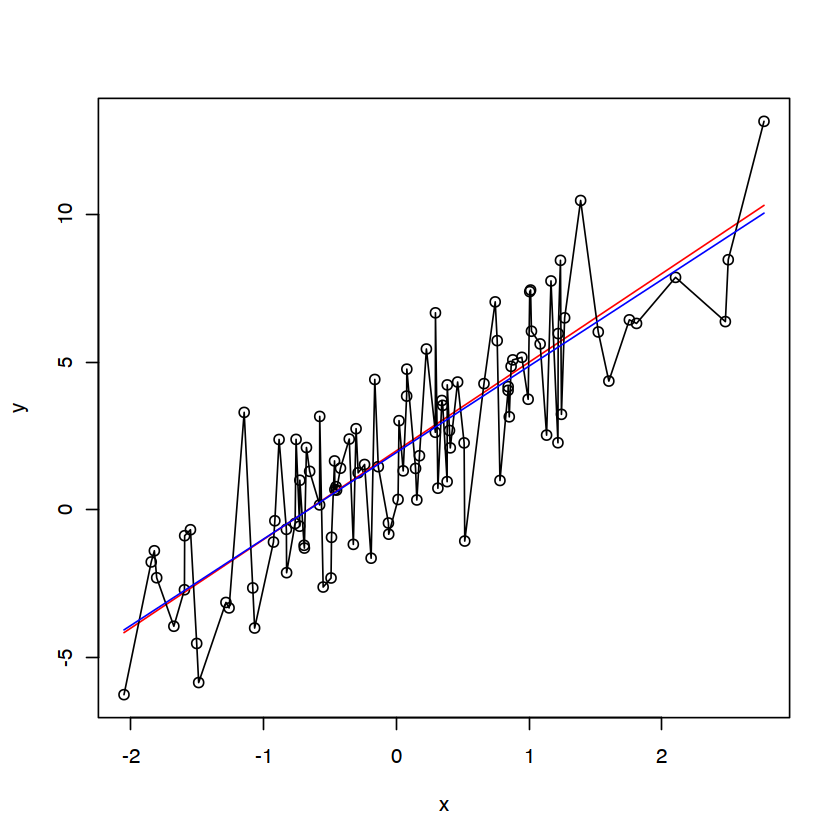

In [15]:
x   <- sort(rnorm(100))
eps <- rnorm(100, mean = 0, sd = 2)
y <- 2 + 3 * x + eps
plot(x, y)
lines(x, 2 + 3 * x, col = "red")
lines(x, y, type = "l")
model <- lm(y ~ x)
coef(model)
lines(x, coef(model)[1] + coef(model)[2] * x, col = "blue")

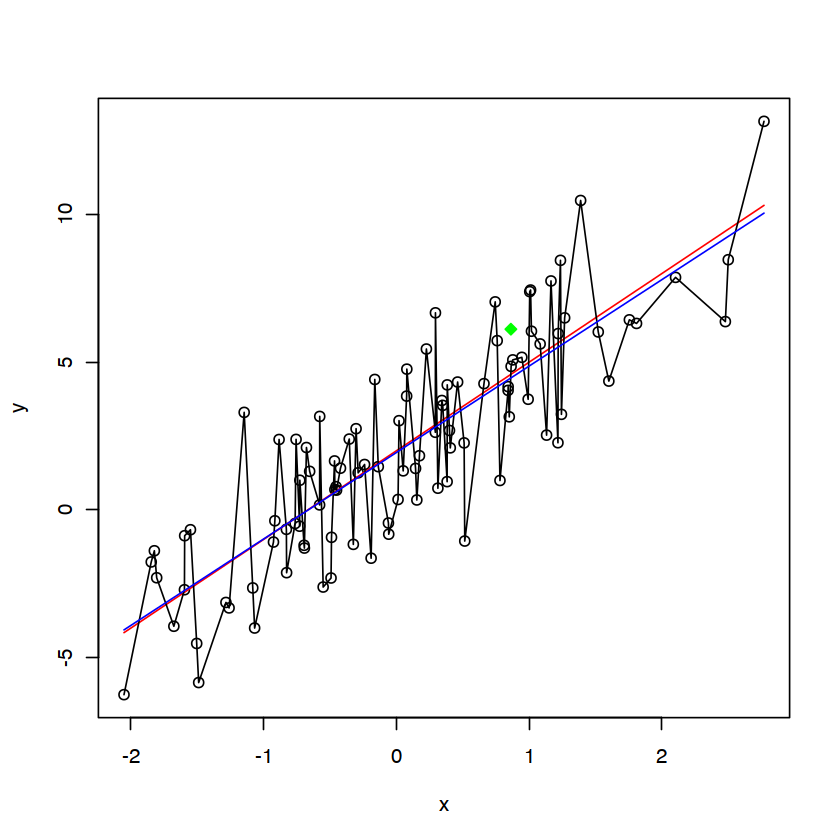

In [31]:
plot(x, y)
lines(x, 2 + 3 * x, col = "red")
lines(x, y, type = "l")
lines(x, coef(model)[1] + coef(model)[2] * x, col = "blue")
x_new   <- rnorm(1)
eps_new <- rnorm(1)
y_new   <- 2 + 3 * x_new + eps_new
points(x_new, y_new, pch = 23, col = "green", bg = "green")

Researchers are mostly interested in two questions.

1. What is the structural relationship between $Y$ and $X$?

2. How to predict $y$ on the basis of a new $x$?

*These questions are related, but not the same!* But for both questions $\text{MSE}$ is not the best measure of success.

To answer 1., we will introduce some measures of fit later on.

What can we do about 2.? One of the options would be to choose $\hat{\rho}(\mathbf{x})$ that gives the lowest $\text{MSE}$ on another dataset (usually called a test dataset). So the problem would be 

$$\text{minimize }\quad \text{Ave} \big(y_i^\prime-\hat{\rho}(\mathbf{x}^\prime_i)\big)^2 \text{ where } \hat{\rho}(\cdot) \text{ was obtained on the basis of } (\mathbf{y}, \mathbf{X}).$$

But where to get this new dataset? Either (a) we can get some new data (almost impossible); or (b) we use resampling methods such as cross-validation.

### Fit of the OLS estimator

Having derived the OLS estimator of the coefficient vector, we can define a few related concepts.

- The vector of the OLS residuals, $\hat{\boldsymbol{\epsilon}} = (\hat{\epsilon}_1, \ldots, \hat{\epsilon}_n)$.

- The vector of the fitted values, $\hat{\mathbf{y}} = \mathbf{X}\hat{\boldsymbol{\beta}}$.

- The residual sum of squares, $\text{RSS} = \hat{\boldsymbol{\epsilon}}^T \hat{\boldsymbol{\epsilon}} = (\mathbf{y} - \hat{\mathbf{y}})^T (\mathbf{y} - \hat{\mathbf{y}})$.


- The OLS estimate of $\sigma^2$ (the variance of the error term), denoted $s^2$, is the sum of squared residuals divided by $n - p$:

$$s^2 = \frac{\text{RSS}}{n - p} = \frac{(\mathbf{y} - \hat{\mathbf{y}})^T (\mathbf{y} - \hat{\mathbf{y}})}{n - p}.$$

Dividing the residual sum of squares by $n − p$ (called the degrees of freedom) rather than by $n$ (the sample size) makes this estimate unbiased for $\sigma^2$. The intuitive reason is that $p$ parameters $\boldsymbol{\beta}$ have to be estimated before obtaining the residual vector $\hat{\boldsymbol{\epsilon}}$ used to calculate $s^2$.

- The square root of $s^2$, $s$, is called the residual standard error. It is an estimate of the standard
deviation of the error term:

$$\text{RSE} = \sqrt{\frac{\text{RSS}}{n - p}} = \sqrt{\frac{(\mathbf{y} - \hat{\mathbf{y}})^T (\mathbf{y} - \hat{\mathbf{y}})}{n- p}}.$$

Roughly speaking, it is the average amount that the response will deviate from the true regression line.

- The sampling error is defined as $\hat{\boldsymbol{\beta}}- \boldsymbol{\beta}$. It too can be related to $\boldsymbol{\epsilon}$ as follows.

$$
\begin{aligned}
\hat{\boldsymbol{\beta}} − \boldsymbol{\beta} &= \big(\mathbf{X}^T\mathbf{X}\big)^{-1}\mathbf{X}^T\mathbf{y} - \boldsymbol{\beta} \\
&= \big(\mathbf{X}^T\mathbf{X}\big)^{-1}\mathbf{X}^T \big(\mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}\big) - \boldsymbol{\beta}\\
&= \big(\mathbf{X}^T\mathbf{X}\big)^{-1}\mathbf{X}^T \mathbf{X}\boldsymbol{\beta} + \big(\mathbf{X}^T\mathbf{X}\big)^{-1}\mathbf{X}^T \boldsymbol{\epsilon}\big) - \boldsymbol{\beta}\\
&= \boldsymbol{\beta} + \big(\mathbf{X}^T\mathbf{X}\big)^{-1}\mathbf{X}^T \boldsymbol{\epsilon} - \boldsymbol{\beta}\\
&= \big(\mathbf{X}^T\mathbf{X}\big)^{-1}\mathbf{X}^T \boldsymbol{\epsilon}.
\end{aligned}
$$

In `R`, we could directly access $\text{RSE}$ for a fitted model.

In [6]:
summary(mpg_model)$sigma

[1] 3.431367

And we can now verify that our math above is indeed calculating the same quantity:

$$\text{RSE} = \sqrt{\frac{(\mathbf{y} - \hat{\mathbf{y}})^T (\mathbf{y} - \hat{\mathbf{y}})}{n- p}} \quad \text{ where } \quad\hat{\mathbf{y}} = \mathbf{X} \hat{\mathbf{\beta}}.$$

In [8]:
beta_hat <- solve(t(X) %*% X) %*% t(X) %*% y
y_hat <- X %*% beta_hat
e     <- y - y_hat
sqrt(t(e) %*% e / (n - p))
sqrt(sum(e^2) / (n - p))

3.431367


[1] 3.431367

The $\text{RSE}$ is considered a measure of the *lack of fit* of the model to the data. But since $\text{RSE}$ it is measured in the units of $Y$, it is not always clear what consitutes a good $\text{RSE}$. $R^2$ statistic, on the other hand, provides an alternative, relative, measure of fit. It takes the form of a proportion of variance explained and it always takes on a value between $0$ and $1$.

$$R^2 = \frac{\text{TSS} - \text{RSS}}{\text{TSS}} = 1 - \frac{\text{RSS}}{\text{TSS}},$$

where $\text{TSS} = \sum_{i=1}^n (y_i - \bar{y})^2$ is the total sum of squares. $\text{TSS}$ measures the total variance in the response $Y$.

`R` calculates this measure of fit automatically.

In [9]:
summary(mpg_model)$r.squared

[1] 0.8082355

But as before, we will calculate it by hand to compare.

In [10]:
TSS <- t(y - mean(y)) %*% (y - mean(y))
RSS <- t(e) %*% e 
R.sq <- (TSS - RSS)/TSS
R.sq

0.8082355


We say that $81\%$ for the observed variation in miles per gallon is explained by the linear relationship with the two predictor variables, weight and year.

**Note:** In case of a single predictor, we can correlation between the outcome and the predictor as another measure of the linear relationship between these random variables. Can we do that in case of multiple regressors as well? Unfortunately, no. The reason is that the concept of correlation between the predictors and the outcome does not extend automatically to the case of many regressors. $R^2$ fills this position for MLR.

## Properties of the OLS estimator

### Assumption 5: Normality of the error term

For purposes of hypothesis testing, we often add the following distributional assumption.

$$ \boldsymbol{\epsilon} | \mathbf{X} \sim N(\boldsymbol{0}, \sigma^2 \mathbb{I}_n) \quad\Leftrightarrow \quad \boldsymbol{y} | \mathbf{X} \sim N(\mathbf{X}\boldsymbol{\beta}, \sigma^2 \mathbb{I}_n).$$

### Unbiasedness

Under Assumptions 1-3, $\mathbb{E}[\hat{\boldsymbol{\beta}}| \mathbf{X}] = \boldsymbol{\beta}$.

**Proof:**

Recall that

$$
\hat{\boldsymbol{\beta}} = \left(  \mathbf{X}^\top \mathbf{X}  \right)^{-1}\mathbf{X}^\top \mathbf{y}
$$

Then since $\mathbf{y} = \mathbf{X} \boldsymbol{\beta} + \mathbf{\epsilon}$, we have

$$
\begin{aligned}
\mathbb{E}[\hat{\boldsymbol{\beta}}| \mathbf{X}] &= 
\mathbb{E}\big[\left(  \mathbf{X}^\top \mathbf{X}  \right)^{-1}\mathbf{X}^\top \mathbf{y}| \mathbf{X}\big]\\
&= 
\mathbb{E}\big[\left(  \mathbf{X}^\top \mathbf{X}  \right)^{-1}\mathbf{X}^\top \mathbf{X} \boldsymbol{\beta}| \mathbf{X}\big] + 
\mathbb{E}\big[\left(  \mathbf{X}^\top \mathbf{X}  \right)^{-1}\mathbf{X}^\top \mathbf{\epsilon}| \mathbf{X}\big]\\
&= 
\boldsymbol{\beta} + 
\left(  \mathbf{X}^\top \mathbf{X}  \right)^{-1}\mathbf{X}^\top \mathbb{E}\big[ \mathbf{\epsilon}| \mathbf{X}\big]\\
&= \boldsymbol{\beta}.
\end{aligned}
$$

### Conditional variance

Under Assumptions 1-5, $\text{Var}[\hat{\boldsymbol{\beta}}| \mathbf{X}] = \sigma^2 \left(  \mathbf{X}^\top \mathbf{X}  \right)^{-1}$.

**Proof:**

$$
\begin{aligned}
\text{Var}[\hat{\boldsymbol{\beta}}| \mathbf{X}] &= 
\mathbb{E}\big[\hat{\boldsymbol{\beta}} \hat{\boldsymbol{\beta}}^\top| \mathbf{X}\big] - \mathbb{E}\big[\hat{\boldsymbol{\beta}}| \mathbf{X}\big] \mathbb{E}\big[\hat{\boldsymbol{\beta}} | \mathbf{X}\big]^\top\\
&= 
\mathbb{E}\big[\hat{\boldsymbol{\beta}} \hat{\boldsymbol{\beta}}^\top| \mathbf{X}\big] - \boldsymbol{\beta} \boldsymbol{\beta}^\top\\
&= 
\mathbb{E}\big[\left(  \mathbf{X}^\top \mathbf{X}  \right)^{-1}\mathbf{X}^\top \mathbf{y}\mathbf{y}^\top\mathbf{X}\left(\mathbf{X}^\top \mathbf{X}  \right)^{-1}| \mathbf{X}\big] - \boldsymbol{\beta} \boldsymbol{\beta}^\top\\
&= 
\left(  \mathbf{X}^\top \mathbf{X}  \right)^{-1}\mathbf{X}^\top \mathbb{E}\big[\mathbf{y}\mathbf{y}^\top| \mathbf{X}\big]\mathbf{X}\left(\mathbf{X}^\top \mathbf{X}  \right)^{-1} - \boldsymbol{\beta} \boldsymbol{\beta}^\top\\
&= 
\left(  \mathbf{X}^\top \mathbf{X}  \right)^{-1}\mathbf{X}^\top \text{Var}\big[\mathbf{y}| \mathbf{X}\big]\mathbf{X}\left(\mathbf{X}^\top \mathbf{X}  \right)^{-1} + \left(  \mathbf{X}^\top \mathbf{X}  \right)^{-1}\mathbf{X}^\top \mathbb{E}\big[\mathbf{y}| \mathbf{X}\big] \mathbb{E}\big[\mathbf{y}| \mathbf{X}\big]^\top\mathbf{X}\left(\mathbf{X}^\top \mathbf{X}  \right)^{-1} - \boldsymbol{\beta} \boldsymbol{\beta}^\top\\
&=\sigma^2 \left(  \mathbf{X}^\top \mathbf{X}  \right)^{-1}\mathbf{X}^\top \mathbf{X}\left(\mathbf{X}^\top \mathbf{X}  \right)^{-1} + \left(  \mathbf{X}^\top \mathbf{X}  \right)^{-1}\mathbf{X}^\top \mathbf{X}\boldsymbol{\beta}\boldsymbol{\beta}^\top\mathbf{X}^\top\mathbf{X}\left(\mathbf{X}^\top \mathbf{X}  \right)^{-1} - \boldsymbol{\beta} \boldsymbol{\beta}^\top\\
&=\sigma^2 \left(  \mathbf{X}^\top \mathbf{X}  \right)^{-1}.
\end{aligned}
$$

### Gauss-Markov theorem

Under Assumptions 1-5, the OLS estimator is efficient in the class of linear and unbiased estimator. That is, for any
unbiased $\hat{\boldsymbol{b}}$ that is linear in $\mathbf{y}$,

$$ \text{Var}[\hat{\boldsymbol{b}}| \mathbf{X}] \geq \text{Var}[\hat{\boldsymbol{\beta}}| \mathbf{X}]$$

in the matrix sense, i.e. $ \text{Var}[\hat{\boldsymbol{b}}| \mathbf{X}] - \text{Var}[\hat{\boldsymbol{\beta}}| \mathbf{X}]$ is a positive semidefinite matrix.

**Note:** In linear algebra, a symmetric $n\times n$ real matrix $M$ is said to be positive-definite if the scalar $z^{\top}Mz$ is non-negative for every non-zero column vector $z$ of $n$ real numbers.

It also means that $ \text{Var}[\hat{b}_k| \mathbf{X}] \geq \text{Var}[\hat{\beta}_k| \mathbf{X}]$ for all $k = 1, \ldots, p$.

### BLUE (Best Linear Unbiased Estimator)

Gauss-Markov theorem states that the OLS estimator is BLUE, i.e. it is efficient in the sense that its conditional variance matrix is the smallest among all of the linear unbiased estimators.

**Note:** This does not mean that OLS estimator is the most efficient among all linear estimators!

### Finite sample properties of $s^2$

1. Unders Assumptions 1-4, we have $\mathbb{E}[s^2 |\mathbf{X}] = \sigma^2$.

2. Implication of 1.: by LIE $\mathbb{E}[s^2] = \sigma^2$.

3. Since $s^2$ is the estimate of $\sigma^2$, a natural estimate of $\text{Var}[\hat{\boldsymbol{\beta}}| \mathbf{X}] = \sigma^2 \left(  \mathbf{X}^\top \mathbf{X}  \right)^{-1}$ 

$$ \widehat{\text{Var}}[\hat{\boldsymbol{\beta}}| \mathbf{X}] = s^2 \left(  \mathbf{X}^\top \mathbf{X}  \right)^{-1} = \frac{\hat{\boldsymbol{\epsilon}}^\top \hat{\boldsymbol{\epsilon}}}{n - p} \left(  \mathbf{X}^\top \mathbf{X}  \right)^{-1}.$$

## Hypothesis testing

First, by all of the above

$$\hat{\boldsymbol{\beta}}| \mathbf{X} \sim N\left(\boldsymbol{\beta}, \sigma^2 \left(\mathbf{X}^\top \mathbf{X}\right)^{-1}  \right).
$$

Then the sampling error $\hat{\boldsymbol{\beta}} - \boldsymbol{\beta}$ is also normally distributed (conditionally on $\mathbf{X}$) with zero mean and variance of $\sigma^2 \left(\mathbf{X}^\top \mathbf{X}\right)^{-1}$.

the standard error for the $\hat{\boldsymbol{\beta}}$ vector is given by

$$
\text{SE}[\hat{\boldsymbol{\beta}}] = s \sqrt{\left(\mathbf{X}^\top \mathbf{X}\right)^{-1}} = \sqrt{\frac{\hat{\boldsymbol{\epsilon}}^\top \hat{\boldsymbol{\epsilon}}}{n - p}\left(\mathbf{X}^\top \mathbf{X}\right)^{-1}}.
$$

Now we focus on the single parameter ${\beta}_k$. First, for any $k$  we have

$$\hat{\beta}_k| \mathbf{X} \sim N\left(\beta_k, \sigma^2 \left(\mathbf{X}^\top \mathbf{X}\right)^{-1}_{kk}  \right),
$$

where $\left(\mathbf{X}^\top \mathbf{X}\right)^{-1}_{kk}$ stands for $k$-th diagonal element of the matrix $\left(\mathbf{X}^\top \mathbf{X}\right)^{-1}_{kk}$.

Moreover, for this particular $\hat{\beta}_k$ we have

$$
\text{SE}[\hat{\beta}_k] = s \sqrt{\left(\mathbf{X}^\top \mathbf{X}\right)^{-1}_{kk}}.
$$

Let's have a look at the data here:

In [15]:
summary(mpg_model)


Call:
lm(formula = mpg ~ wt + year, data = autompg)

Residuals:
   Min     1Q Median     3Q    Max 
-8.852 -2.292 -0.100  2.039 14.325 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.464e+01  4.023e+00  -3.638 0.000312 ***
wt          -6.635e-03  2.149e-04 -30.881  < 2e-16 ***
year         7.614e-01  4.973e-02  15.312  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.431 on 387 degrees of freedom
Multiple R-squared:  0.8082,	Adjusted R-squared:  0.8072 
F-statistic: 815.6 on 2 and 387 DF,  p-value: < 2.2e-16


In [13]:
#s.sq <- (t(y - y_hat) %*% (y - y_hat)) / (n - p)
s.sq <- sum((y - y_hat) ^ 2) / (n - p)
s.sq
OLS_variance <- s.sq * solve(t(X) %*% X)
sqrt(diag(OLS_variance))

11.77428


[1] 11.77428

[1] 4.0233913563 0.0002148504 0.0497265950

### Testing hypotheses about individual OLS regression coefficients

The first test we will see is a test for a single $\beta_k$:

$$
H_0: \beta_k = 0 \quad \text{vs} \quad H_1: \beta_k \neq 0
$$

Since each of the $\hat{\beta}_k$ follows a normal distribution, we have the following result

$$ \frac{\hat{\beta}_k - \beta_k}{s \sqrt{\left(\mathbf{X}^\top \mathbf{X}\right)^{-1}_{kk}}} \sim t_{n-p}.$$


The test statistic then takes the form

$$t = \frac{\hat{\beta}_k - \beta_k}{\text{SE}[\hat{\beta}_k]} = \frac{\hat{\beta}_k-0}{s\sqrt{\left(\mathbf{X}^\top \mathbf{X}\right)^{-1}_{kk}}},
$$

which, under the null hypothesis, follows a $t$ distribution with $n - p$ degrees of freedom.

Recall our model for `mpg`, 

$$
y_i = \beta_1 + \beta_2 x_{i2} + \beta_3 x_{i3} + \epsilon_i, \qquad i = 1, 2, \ldots, n
$$

- $x_{i2}$ as the weight (`wt`) of the $i$th car.
- $x_{i3}$ as the model year (`year`) of the $i$th car.

Then the test

$$
H_0: \beta_2 = 0 \quad \text{vs} \quad H_1: \beta_2 \neq 0
$$

can be found in the `summary()` output, in particular:

In [13]:
summary(mpg_model)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-14.637641945,4.0233913563,-3.638135,3.118311e-04
wt,-0.006634876,0.0002148504,-30.881372,1.850466e-106
year,0.761401955,0.0497265950,15.311765,1.036597e-41


The estimate (`Estimate`), standard error (`Std. Error`), test statistic (`t value`), and p-value (`Pr(>|t|)`) for this test are displayed in the second row, labeled `wt`. Remember that the p-value given here is specifically for a two-sided test, where the hypothesized value is 0.

Now we repeat the calculations by hand:

In [17]:
t_1 <- beta_hat[1] / sqrt(diag(OLS_variance))[1]
t_1

[1] -3.638135

In [15]:
2 * pt(-abs(t_1), df = n - p)

[1] 0.0003118311

Also note in this case, by hypothesizing that $\beta_2 = 0$ the null and alternative essentially specify two different models:

- $H_0$: $Y = \beta_0 + \beta_2 x_{2} + \epsilon$
- $H_1$: $Y = \beta_0 + \beta_1 x_{1} + \beta_2 x_{2} + \epsilon$

This is important. We are not simply testing whether or not there is a relationship between weight and fuel efficiency. We are testing if there is a relationship between weight and fuel efficiency, given that a term for year **is** in the model.

### Confidence intervals

Since $\hat{\beta}_k$ is our estimate for $\beta_k$ and we have

$$
\mathbb{E}[\hat{\beta}_k] = \beta_k
$$

as well as the standard error,

$$
\text{SE}[\hat{\beta}_k] = s\sqrt{\left(\mathbf{X}^\top \mathbf{X}\right)^{-1}_{kk}}
$$

and the sampling distribution of $\hat{\beta}_j$ is normal, then we can easily construct confidence intervals for each of the $\hat{\beta}_k$:

$$
\hat{\beta}_k \pm t_{\alpha/2, n - p} \cdot s\sqrt{\left(\mathbf{X}^\top \mathbf{X}\right)^{-1}_{kk}}
$$

In [18]:
alpha <- 0.01
conf_ints <- matrix(NA, nrow = p, ncol = 2)
conf_ints[, 1] <- beta_hat - qt(alpha/2, df = n - p, lower.tail = FALSE) * sqrt(diag(OLS_variance))
conf_ints[, 2] <- beta_hat + qt(alpha/2, df = n - p, lower.tail = FALSE) * sqrt(diag(OLS_variance))
conf_ints

-25.052563681,-4.222720208
-0.007191036,-0.006078716
0.632680051,0.890123859


We can find these in `R` using the built-in function `confint`:

In [34]:
confint(mpg_model, level = 0.99)

,0.5 %,99.5 %
(Intercept),-25.052563681,-4.222720208
wt,-0.007191036,-0.006078716
year,0.632680051,0.890123859


### Testing linear (joint) hypotheses (Wald test)

We can generalize the above to test null hypothesis that consider not only a single individual coefficient but a linear combination of them, written as a system of linear equation.

Suppose $H_0: \mathbf{R}\boldsymbol{\beta} = \mathbf{r}$ where $\mathbf{R}$ is a $r \times p$ known matrix and $\mathbf{r}$ is a $r \times 1$ known vector, both specified by the hypothesis,

Here by $r$ we denote the dimension or $r$, i.e. the number of equations. We assume that $r < p$. We also assume that $\text{rank}{\mathbf{R}} = r$ (we impose the assumption of the full row rank to make sure that there are no redundant equations and that equations are consistent with each other).
 
We reject/don’t reject null based on the finite sample distribution of Wald statistic:

$$
W = \frac{(\mathbf{R}\hat{\boldsymbol{\beta}} - \mathbf{r})^\top \big[\mathbf{R} (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{R}^\top\big]^{-1}(\mathbf{R}\hat{\boldsymbol{\beta}} - \mathbf{r})/r}{s^2} = (\mathbf{R}\hat{\boldsymbol{\beta}} - \mathbf{r})^\top \big[\mathbf{R} \widehat{\text{Var}}(\hat{\boldsymbol{\beta}} | \mathbf{X})\mathbf{R}^\top\big]^{-1}(\mathbf{R}\hat{\boldsymbol{\beta}} - \mathbf{r})/r
$$

Under the null, the Wald statistic is $F(r, n-p)$ distributed. Hence, the decision rule is: **Reject for large values of $W$!**

**Example**

Suppose we would like to jointly test the hypothesis that all of the coefficients (except the intercept) are equal to zero simultaneously. We can then write the null in the necessary form: $H_0: \mathbf{R}\boldsymbol{\beta} = \mathbf{r}$, where 

$$
\mathbf{R} = \begin{bmatrix}
0    & 1    & 0 \\
0    & 0    & 1 \\
\end{bmatrix}, \quad \text{and} \quad
\mathbf{r} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}.
$$

Thus, the Wald statistic cab be written as 

$$
W = \frac{(\mathbf{R}\hat{\boldsymbol{\beta}})^\top \big[\mathbf{R}(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{R}^\top\big]^{-1}(\mathbf{R}\hat{\boldsymbol{\beta}})/(p - 1)}{s^2}
$$

and under the null $W \sim F_{p - 1, n- p}$.


In [25]:
R <- matrix(c(0, 0, 1, 0, 0, 1), nrow = 2, ncol = 3)
R
A <- solve(t(X) %*% X)
W <- t(R %*% beta_hat) %*% solve(R %*% A %*% t(R)) %*% (R %*% beta_hat) / (s.sq * (p - 1))
W

0,1,0
0,0,1


815.5501


Compare to the last line of `summary`:

In [26]:
summary(mpg_model)


Call:
lm(formula = mpg ~ wt + year, data = autompg)

Residuals:
   Min     1Q Median     3Q    Max 
-8.852 -2.292 -0.100  2.039 14.325 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.464e+01  4.023e+00  -3.638 0.000312 ***
wt          -6.635e-03  2.149e-04 -30.881  < 2e-16 ***
year         7.614e-01  4.973e-02  15.312  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.431 on 387 degrees of freedom
Multiple R-squared:  0.8082,	Adjusted R-squared:  0.8072 
F-statistic: 815.6 on 2 and 387 DF,  p-value: < 2.2e-16


Alternatively, we can use the following (more convenient) expression of the statistic, that is calculated based onthe likelihood-ratio principle.

$$
F = \frac{(\text{RSS}_{\text{rest}} - \text{RSS}_{\text{unrest}}) / r}{\text{RSS}_{\text{unrest}}/ (n - p)},
$$

where $\text{RSS}_{\text{rest}}$ is the residual sum of squares in the **restricted** model, i.e. under the null, and $\text{RSS}_{\text{rest}}$ is the residual sum of squares in the **unrestricted** model.

In our example, $F$ can be calculated as 

$$
F = \frac{\sum_{i=1}^{n}(\hat{y}_{i} - \bar{y})^2 / (p - 1)}{\sum_{i=1}^{n}(y_i - \hat{y}_{i})^2 / (n - p)}
$$

with $\bar{y} = \frac{1}{n}\sum_{i=1}^n y_i$.

**Note** on $t$ vs. Wald statistics:

1. Wald test and $t$-tests are equivalent when testing hypotheses about individual coefficients.

*Try to show it yourself at home*.

2. In case of testing performing at least two $t$-tests simultaneously, the Wald test is preferred.

*Why?*

## Simulation

In this section, we will use simulation to illustrate some of the above results. In particular, we will simulate samples of size `n = 1000` from the model

$$
y_i = 5 + -2 x_{i2} + 6 x_{i3} + \epsilon_i, \qquad i = 1, 2, \ldots, n
$$

where $\epsilon_i \sim N(0, \sigma^2 = 16)$. Here we have two predictors, so $p = 3$.

In [43]:
set.seed(234)
n = 1000 # sample size
p = 3
beta_1 = 5
beta_2 = -2
beta_3 = 6
sigma  = 4

First, we simulate the predictors together with the constant. We wil also calculate the matrix $(\mathbf{X}^\top \mathbf{X})^{-1}$ that we will need further on.

In [44]:
x1 = rep(1, n)
x2 = runif(n, min = 1, max = 10)
x3 = runif(n, min = 1, max = 10)
X = cbind(x1, x2, x3)
A = solve(t(X) %*% X)

We then simulate the response according the model above. Lastly, we place the two predictors and response into a data frame. Note that we do **not** place constant `x1` in the data frame. This is a result of `R` adding an intercept by default.

In [45]:
eps      = rnorm(n, mean = 0, sd = sigma)
y        = beta_1 + beta_2 * x2 + beta_3 * x3 + eps
sim_data = data.frame(x2, x3, y)

Plotting this data and fitting the regression produces the following plot.

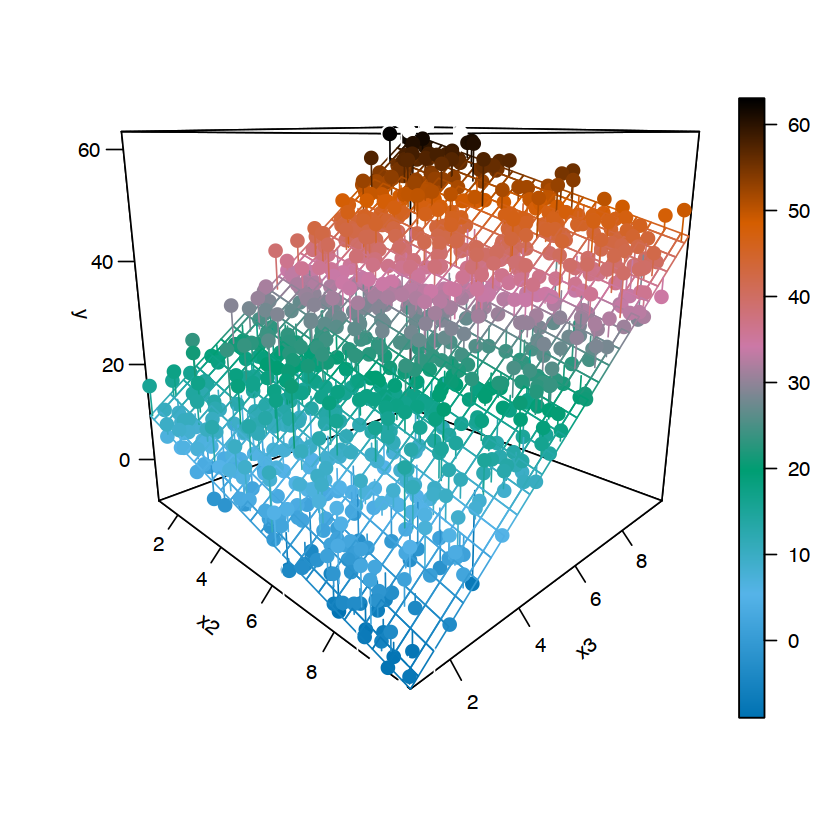

In [46]:
fit = lm(y ~ x2 + x3)
grid.lines = 25
x2.pred = seq(min(x2), max(x2), length.out = grid.lines)
x3.pred = seq(min(x3), max(x3), length.out = grid.lines)
x2x3 = expand.grid(x2 = x2.pred, x3 = x3.pred)
y.pred = matrix(predict(fit, newdata = x2x3), 
                 nrow = grid.lines, ncol = grid.lines)
# fitted points for droplines to surface
fitpoints = predict(fit)
# scatter plot with regression plane
scatter3D(x2, x3, y, pch = 20, cex = 2, col = gg.col(1000), lighting = TRUE,
          theta = 45, phi = 15, ticktype = "detailed", zlim = c(min(y.pred), max(y.pred)), clim = c(min(y.pred), max(y.pred)),
          xlab = "x2", ylab = "x3", zlab = "y",
          surf = list(x = x2.pred, y = x3.pred, z = y.pred,  
                      facets = NA, fit = fitpoints), main = "")

We then calculate the OLS estimator $\hat{\boldsymbol{\beta}}$:

$$
\hat{\boldsymbol{\beta}} = \left(  \mathbf{X}^\top  \mathbf{X}  \right)^{-1}  \mathbf{X}^\top  \mathbf{y}.
$$

In [47]:
(beta_hat = A %*% t(X) %*% y)

x1,5.406018
x2,-2.051779
x3,5.981395


[1] 5.981395

Notice that these values are close to what we would expect.

In [33]:
c(beta_1, beta_2, beta_3)

[1]  5 -2  6

We then calculated the fitted values in order to calculate $s$, which we see is the same as the `sigma` which is returned by `summary()`.

In [34]:
y_hat = X %*% beta_hat
(s = sqrt(sum((y - y_hat) ^ 2) / (n - p)))
summary(lm(y ~ x2 + x3, data = sim_data))$sigma

[1] 3.986149

[1] 3.986149

Now we will finally simulate from this model repeatedly in order to obtain an empirical distribution of $\hat{\beta}_3$.

We expect $\hat{\beta}_3$ to follow a normal distribution,

$$
\hat{\beta}_3 | \mathbf{X} \sim N\left(\beta_3, \sigma^2 A_{33}  \right).
$$

In [37]:
beta_3
A[3, 3]
sigma^2 * A[3, 3]

[1] 6

[1] 0.0001421361

[1] 0.002274178

Hence, in our case,
$$
\hat{\beta}_3 \sim N\left(6, 0.00227417778008644\right).
$$

We now perform the simulation a large number of times. Each time, we update the `y` variable in the data frame based on the new `x` and `eps`. We then fit a model, and store $\hat{\beta}_3$.

In [50]:
num_sims = 10000
beta_hat_3 = rep(0, num_sims)
for(i in 1:num_sims) {
    x1  <- rep(1, n)
    x2  <- runif(n, min = 1, max = 10)
    x3  <- runif(n, min = 1, max = 10)
    X   <- cbind(x1, x2, x3)
    eps <-rnorm(n, mean = 0 , sd = sigma)
    y   <- beta_1 + beta_2 * x2 + beta_3 * x3 + eps
    
    beta_hat      <- solve(t(X) %*% X) %*% t(X) %*% y
    beta_hat_3[i] <- beta_hat[3]
}

We then see that the mean of the simulated values is close to the true value of $\beta_3$.

In [51]:
mean(beta_hat_3)
beta_3

[1] 6.000414

[1] 6

We also see that the variance of the simulated values is close to the true variance of $\hat{\beta}_3$.

$$
\text{Var}[\hat{\beta}_3 | \mathbf{X}] = \sigma^2 \cdot A_{33} = 0.00227417778008644
$$

In [52]:
var(beta_hat_3)
sigma^2 * solve(t(X) %*% X)

[1] 0.00237987

,x1,x2,x3
x1,0.16047655,-1.343417e-02,-1.291676e-02
x2,-0.01343417,2.437579e-03,2.493119e-05
x3,-0.01291676,2.493119e-05,2.318805e-03


Lastly, we plot a histogram of the *simulated values*, and overlay the *true distribution*.

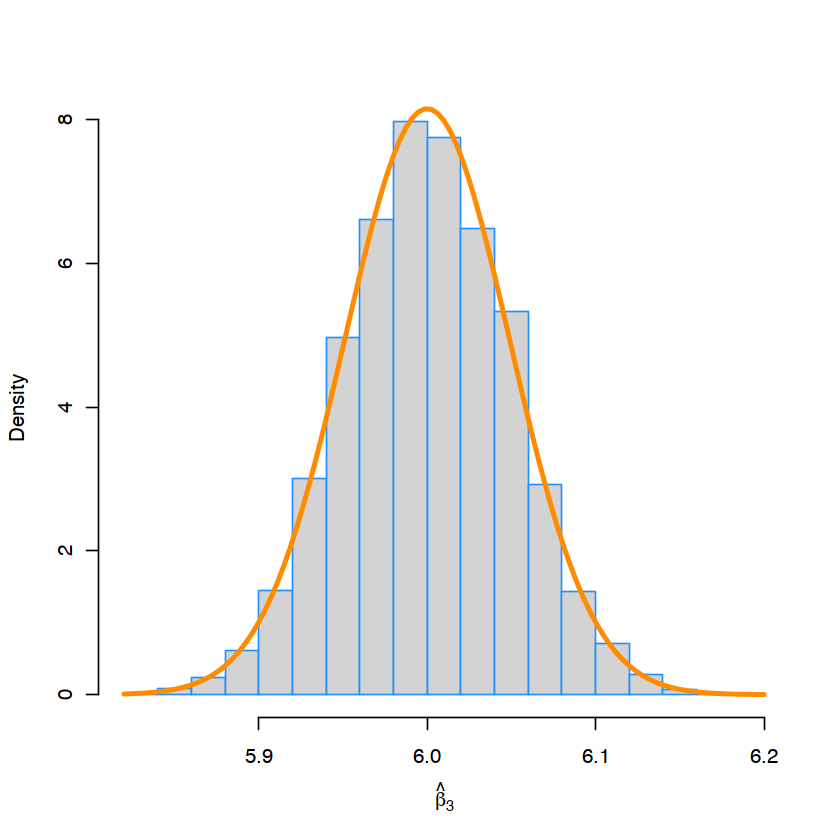

In [53]:
hist(beta_hat_3, prob = TRUE, breaks = 20, 
     xlab = expression(hat(beta)[3]), main = "", border = "dodgerblue")
curve(dnorm(x, mean = beta_3, sd = sqrt(sigma ^ 2 * A[3, 3])), 
      col = "darkorange", add = TRUE, lwd = 3)

The simulation-based histogram appears to be Normal with mean 6 and spread of about 0.15 as you measure from center to inflection point. That matches really well with the sampling distribution of $\hat{\beta}_3$.

![mlr.jpg](mlr.jpg)